In [1]:
import numpy as np
import xgboost as xgb
from wideboost.wrappers import wxgb
from wideboost.wrappers.wxgb import wxgbModel

import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

ds_train, ds_info = tfds.load(
    'titanic',
    split=['train'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

for i in ds_train[0].batch(60000):
    a = i

In [2]:
## Keep only numeric columns. Randomly split the dataset into training and test

X = []
for s in a[0].keys():
    if a[0][s].dtype != tf.string:
        X.append(a[0][s].numpy().reshape([-1,1]))

X = np.concatenate(X,axis=1)

idx = np.arange(X.shape[0])
np.random.seed(1)
train_idx = np.random.choice(idx, round(0.7*X.shape[0]), replace=False)
test_idx = np.setdiff1d(idx,train_idx)

xtrain = X
ytrain = a[1].numpy()

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_params = {
    'extra_dims':[0,1,4,8,16],
    'max_depth':[1,4,8],
    'eta':[0.05,0.1,0.2],
    'objective':['binary:logistic'],
    'subsample':[0.75,1.0],
    'colsample_bytree':[0.75,1.0],
    'n_estimators':[10,40,80],
    'min_child_weight':[0,1,2,4,8],
    'eval_metric':[['error']]
}

gs = GridSearchCV(wxgbModel(), gs_params)
gs.fit(xtrain, y=ytrain)

In [5]:
score = gs.cv_results_['mean_test_score']
nest = gs.cv_results_['param_n_estimators']
mcw = gs.cv_results_['param_min_child_weight']
edims = gs.cv_results_['param_extra_dims']
print("WINNING params with following error")
print(gs.cv_results_['mean_test_score'][np.argmin(gs.cv_results_['mean_test_score'])])
gs.cv_results_['params'][np.argmin(gs.cv_results_['mean_test_score'])]



WINNING params with following error
0.1741891140943523


{'colsample_bytree': 0.75,
 'eta': 0.1,
 'eval_metric': ['error'],
 'extra_dims': 8,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 10,
 'objective': 'binary:logistic',
 'subsample': 1.0}

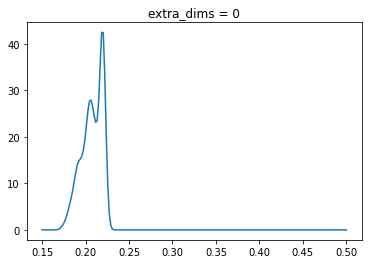

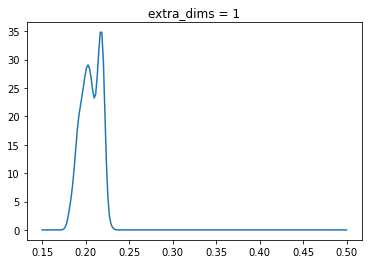

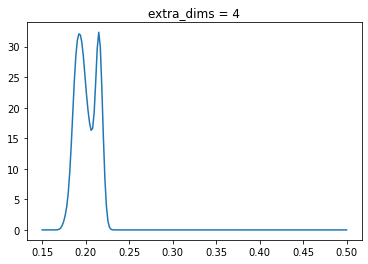

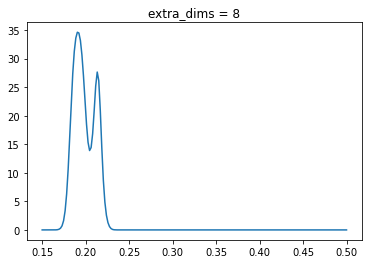

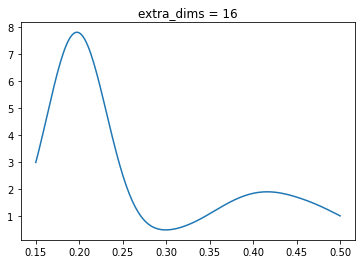

Median Results:
extra_dims = 0: 0.20893363750694627
extra_dims = 1: 0.2062501827966424
extra_dims = 4: 0.19937849141586966
extra_dims = 8: 0.19631628206253107
extra_dims = 16: 0.21005674007779823


In [14]:
from scipy.stats import gaussian_kde
xs = np.linspace(0.15,0.5,200)
plt.plot(xs,gaussian_kde(score[edims==0])(xs))
plt.title("extra_dims = 0")
plt.show()
plt.plot(xs,gaussian_kde(score[edims==1])(xs))
plt.title("extra_dims = 1")
plt.show()
plt.plot(xs,gaussian_kde(score[edims==4])(xs))
plt.title("extra_dims = 4")
plt.show()
plt.plot(xs,gaussian_kde(score[edims==8])(xs))
plt.title("extra_dims = 8")
plt.show()
plt.plot(xs,gaussian_kde(score[edims==16])(xs))
plt.title("extra_dims = 16")
plt.show()

print("Median Results:")
print("extra_dims = 0:",np.median(score[edims==0]))
print("extra_dims = 1:",np.median(score[edims==1]))
print("extra_dims = 4:",np.median(score[edims==4]))
print("extra_dims = 8:",np.median(score[edims==8]))
print("extra_dims = 16:",np.median(score[edims==16]))  ### Overfitting 